In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

In [2]:
DATA_PATH = "data/raw/ieee-cis/"

tx = pd.read_csv(DATA_PATH + "train_transaction.csv")
idn = pd.read_csv(DATA_PATH + "train_identity.csv")

print(tx.shape, idn.shape)

(590540, 394) (144233, 41)


In [3]:
tx.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,...,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5000,W,13926,NaN,150.0000,discover,142.0000,credit,315.0000,87.0000,19.0000,NaN,NaN,NaN,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000,1.0000,1.0000,14.0000,NaN,13.0000,NaN,NaN,NaN,NaN,NaN,NaN,13.0000,13.0000,NaN,NaN,NaN,0.0000,T,T,T,M2,F,T,NaN,NaN,NaN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,117.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0000,W,2755,404.0000,150.0000,mastercard,102.0000,credit,325.0000,87.0000,NaN,NaN,gmail.com,NaN,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0000,W,4663,490.0000,150.0000,visa,166.0000,debit,330.0000,87.0000,287.0000,NaN,outlook.com,NaN,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,315.0000,NaN,NaN,NaN,315.0000,T,T,T,M0,F,F,F,F,F,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
tx.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [22]:
print("Rows:", len(tx))
print("Fraud count:", tx["isFraud"].sum())
print("Fraud rate:", tx["isFraud"].mean() * 100)

Rows: 590540
Fraud count: 20663
Fraud rate: 3.4990009144173126


In [5]:
idn.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0000,"70,787.0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0000,NotFound,NaN,-480.0000,New,NotFound,166.0000,NaN,542.0000,144.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0000,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0000,"98,945.0000",NaN,NaN,0.0000,-5.0000,NaN,NaN,NaN,NaN,100.0000,NotFound,49.0000,-300.0000,New,NotFound,166.0000,NaN,621.0000,500.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0000,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0000,"191,631.0000",0.0000,0.0000,0.0000,0.0000,NaN,NaN,0.0000,0.0000,100.0000,NotFound,52.0000,NaN,Found,Found,121.0000,NaN,410.0000,142.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0000,"221,832.0000",NaN,NaN,0.0000,-6.0000,NaN,NaN,NaN,NaN,100.0000,NotFound,52.0000,NaN,New,NotFound,225.0000,NaN,176.0000,507.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0000,"7,460.0000",0.0000,0.0000,1.0000,0.0000,NaN,NaN,0.0000,0.0000,100.0000,NotFound,NaN,-300.0000,Found,Found,166.0000,15.0000,529.0000,575.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0000,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
idn.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
df = tx.merge(idn, on="TransactionID", how="left")

print("Merged shape:", df.shape)

Merged shape: (590540, 434)


In [8]:
n_total = len(df)
n_fraud = df["isFraud"].sum()
fraud_rate = n_fraud / n_total * 100

print(f"Total transactions: {n_total:,}")
print(f"Fraud transactions: {n_fraud:,}")
print(f"Fraud rate: {fraud_rate:.4f}%")

Total transactions: 590,540
Fraud transactions: 20,663
Fraud rate: 3.4990%


Only ~3.49% of transactions are fraudulent, making this an extreme class-imbalance problem where ranking matters more than classification accuracy.

In [9]:
for k in [0.1, 0.5, 1.0]:
    n = int(n_total * k / 100)
    print(f"Top {k}% = {n:,} transactions for review")

Top 0.1% = 590 transactions for review
Top 0.5% = 2,952 transactions for review
Top 1.0% = 5,905 transactions for review


In [10]:
feature_groups = {
    "V": [c for c in df.columns if c.startswith("V")],
    "C": [c for c in df.columns if c.startswith("C")],
    "D": [c for c in df.columns if c.startswith("D")],
    "M": [c for c in df.columns if c.startswith("M")],
}

for k, v in feature_groups.items():
    print(f"{k}-features: {len(v)}")

V-features: 339
C-features: 14
D-features: 17
M-features: 9


In [11]:
identity_cols = idn.columns.drop("TransactionID")

identity_present = df[identity_cols].notna().any(axis=1)

print("Identity available:")
print(identity_present.value_counts(normalize=True) * 100)

print("\nFraud rate by identity availability:")
print(
    df.groupby(identity_present)["isFraud"]
      .mean()
      .rename({False: "No Identity", True: "Identity"})
)

Identity available:
False   75.5761
True    24.4239
Name: proportion, dtype: float64

Fraud rate by identity availability:
No Identity   0.0209
Identity      0.0785
Name: isFraud, dtype: float64


In [13]:
missing_pct = df.isna().mean().sort_values(ascending=False)

missing_pct.head(15)

id_24   0.9920
id_25   0.9913
id_07   0.9913
id_08   0.9913
id_21   0.9913
id_26   0.9913
id_27   0.9912
id_23   0.9912
id_22   0.9912
dist2   0.9363
D7      0.9341
id_18   0.9236
D13     0.8951
D14     0.8947
D12     0.8904
dtype: float64

In [15]:
missing_fraud = df[df["isFraud"] == 1].isna().mean()
missing_nonfraud = df[df["isFraud"] == 0].isna().mean()

missing_compare = (
    pd.DataFrame({
        "fraud": missing_fraud,
        "non_fraud": missing_nonfraud
    })
    .assign(diff=lambda x: x["fraud"] - x["non_fraud"])
    .sort_values("diff", ascending=False)
)
print(missing_compare.shape)
missing_compare.head(10)

(434, 3)


,fraud,non_fraud,diff
M6,0.5793,0.2762,0.3032
addr2,0.3746,0.1017,0.2729
addr1,0.3746,0.1017,0.2729
M3,0.6931,0.4506,0.2425
M2,0.6931,0.4506,0.2425
M1,0.6931,0.4506,0.2425
V1,0.7045,0.4645,0.2400
V2,0.7045,0.4645,0.2400
V4,0.7045,0.4645,0.2400
V3,0.7045,0.4645,0.2400


In [16]:
df_sorted = df.sort_values("TransactionDT")

mid_point = len(df_sorted) // 2
early = df_sorted.iloc[:mid_point]
late = df_sorted.iloc[mid_point:]

print("Early fraud rate:", early["isFraud"].mean())
print("Late fraud rate:", late["isFraud"].mean())

Early fraud rate: 0.03350831442408643
Late fraud rate: 0.03647170386425983


In [19]:
if "card1" in df.columns:
    fraud_by_card = (
        df[df["isFraud"] == 1]
        .groupby("card1")
        .size()
        .sort_values(ascending=False)
    )

    print("Top 10 cards by fraud count:")
    fraud_by_card.head(10)

Top 10 cards by fraud count:


In [20]:
sample_features = feature_groups["V"][:5] + feature_groups["C"][:5]

stability = pd.DataFrame({
    "early_mean": early[sample_features].mean(),
    "late_mean": late[sample_features].mean(),
    "delta": late[sample_features].mean() - early[sample_features].mean()
})

stability

,early_mean,late_mean,delta
V1,1.0000,0.9999,-0.0000
V2,1.0338,1.0514,0.0175
V3,1.0626,1.0865,0.0239
V4,0.8237,0.8588,0.0350
V5,0.8545,0.8892,0.0347
C1,18.9125,9.2724,-9.6401
C2,21.0183,9.5212,-11.4972
C3,0.0065,0.0048,-0.0018
C4,6.7995,1.3848,-5.4147
C5,5.0136,6.1295,1.1159


In [21]:
print("Numeric features:", df.select_dtypes(include=np.number).shape[1])
print("Categorical features:", df.select_dtypes(exclude=np.number).shape[1])

Numeric features: 403
Categorical features: 31


In [24]:
from scipy.stats import ks_2samp

features = ["TransactionAmt"] + feature_groups["V"][:10]

sep = []
for f in features:
    fraud = df[df["isFraud"] == 1][f].dropna()
    nonfraud = df[df["isFraud"] == 0][f].dropna()
    ks = ks_2samp(fraud, nonfraud).statistic
    sep.append((f, ks))

pd.DataFrame(sep, columns=["feature", "ks_stat"]).sort_values("ks_stat", ascending=False)

,feature,ks_stat
10,V10,0.2806
0,TransactionAmt,0.0756
3,V3,0.0755
5,V5,0.0697
9,V9,0.0537
7,V7,0.0395
4,V4,0.0359
2,V2,0.0245
8,V8,0.0158
6,V6,0.0135


### Feature Separability Analysis

Univariate KS-statistic analysis shows that most features exhibit weak global separation between fraud and non-fraud transactions. Only a small subset of features (e.g., V10) demonstrates moderate distributional differences, while commonly assumed signals such as transaction amount show limited separability.

This suggests that fraud in this dataset is not driven by simple univariate thresholds, but rather by multivariate and potentially local patterns. As a result, ranking-based and multivariate anomaly detection approaches are more appropriate than rule-based or single-feature models.

In [25]:
from scipy.stats import ks_2samp

# Select top 20 V features
v_features = feature_groups["V"][:20]

ks_results = []

for f in v_features:
    fraud = df[df["isFraud"] == 1][f].dropna()
    nonfraud = df[df["isFraud"] == 0][f].dropna()

    if len(fraud) > 0 and len(nonfraud) > 0:
        ks = ks_2samp(fraud, nonfraud).statistic
        ks_results.append((f, ks))

ks_v = (
    pd.DataFrame(ks_results, columns=["feature", "ks_stat"])
    .sort_values("ks_stat", ascending=False)
)

ks_v

,feature,ks_stat
14,V15,0.3265
15,V16,0.3265
17,V18,0.3180
16,V17,0.3179
9,V10,0.2806
10,V11,0.2803
12,V13,0.1759
11,V12,0.1726
2,V3,0.0755
4,V5,0.0697


### Extended Feature Separability Analysis

KS-statistic analysis across the first 20 engineered V-features reveals that fraud-related signal is concentrated in a small subset of features (notably V15–V18 and V10–V11), which exhibit moderate global distributional separation. However, even these features show substantial overlap between fraud and non-fraud transactions, indicating that no single feature provides reliable threshold-based discrimination.

The clustering of separability among related V-features suggests correlated transformations rather than independent signals. This reinforces the need for multivariate ranking approaches and cautions against over-reliance on univariate feature importance.

In [27]:
cd_features = feature_groups["C"] + feature_groups["D"]

ks_results_cd = []

for f in cd_features:
    fraud = df[df["isFraud"] == 1][f].dropna()
    nonfraud = df[df["isFraud"] == 0][f].dropna()

    if len(fraud) > 0 and len(nonfraud) > 0:
        ks = ks_2samp(fraud, nonfraud).statistic
        ks_results_cd.append((f, ks))

ks_cd = (
    pd.DataFrame(ks_results_cd, columns=["feature", "ks_stat"])
    .sort_values("ks_stat", ascending=False)
)

ks_cd

,feature,ks_stat
18,D5,0.4371
16,D3,0.3618
3,C4,0.3310
15,D2,0.3248
7,C8,0.3163
21,D8,0.3139
9,C10,0.3119
11,C12,0.2967
8,C9,0.2921
4,C5,0.2872


### Behavioral Feature Separability (C/D Features)

KS-statistic analysis reveals that temporal (D) and count-based (C) features exhibit substantially stronger univariate separability than masked V-features. Several D-features (e.g., D5, D3) show high distributional divergence between fraud and non-fraud transactions, suggesting that fraud behavior manifests more strongly through timing irregularities and frequency patterns than through static transaction attributes.

However, despite higher separability, significant overlap remains across all features, indicating that no single behavioral feature provides reliable threshold-based discrimination. This reinforces the need for multivariate ranking systems that combine both global behavioral shifts and subtle local patterns.

In [29]:
import matplotlib.pyplot as plt

def plot_cdf(feature):
    fraud = df[df["isFraud"] == 1][feature].dropna()
    nonfraud = df[df["isFraud"] == 0][feature].dropna()

    plt.figure(figsize=(6, 4))
    plt.hist(nonfraud, bins=100, density=True, cumulative=True, alpha=0.6, label="Non-Fraud")
    plt.hist(fraud, bins=100, density=True, cumulative=True, alpha=0.6, label="Fraud")
    plt.title(f"CDF Comparison: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True)
    plt.show()

Matplotlib is building the font cache; this may take a moment.


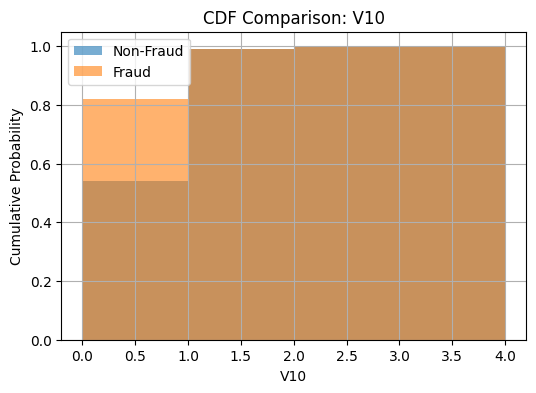

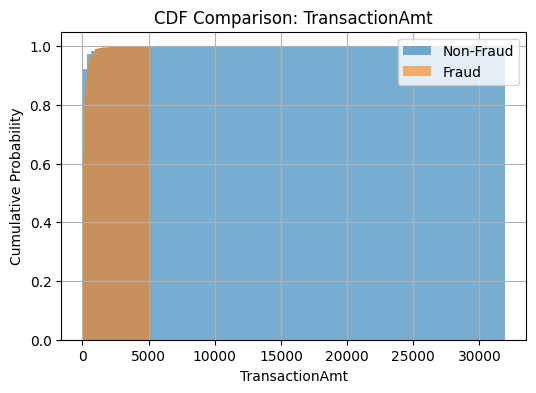

In [30]:
plot_cdf("V10")
plot_cdf("TransactionAmt")

### CDF-Based Interpretation

CDF comparisons show that even features with moderate KS-statistics exhibit substantial overlap between fraud and non-fraud distributions. While fraud-related distributions are shifted relative to non-fraud, no feature demonstrates a clear threshold that cleanly separates the two classes.

This indicates that fraud detection in this dataset is fundamentally a ranking problem rather than a threshold-based classification task. Individual features provide ordering signal but not decisive discrimination, reinforcing the need for multivariate ranking models.

## Key EDA Takeaways

- The dataset contains approximately 590k transactions with a fraud rate of ~3.5%, representing a moderately imbalanced setting where operational constraints limit the fraction of transactions that can be reviewed.
- Although fraud is not ultra-rare, labels remain weak and noisy, and decision-making is inherently capacity-constrained, motivating ranking-based risk assessment rather than binary classification.
- Identity information is missing for a substantial portion of transactions and differs systematically between fraud and non-fraud cases, indicating that identity availability itself may carry risk signal.
- Missingness patterns are non-random and exhibit label-dependent structure, suggesting that absence of information should be treated as informative rather than purely a data quality issue.
- Univariate separability analysis shows that static engineered features exhibit weak global discrimination, while behavioral aggregation features (temporal and count-based) demonstrate stronger distributional shifts; however, substantial overlap persists across all feature groups.
- CDF analysis confirms that even the most separable features do not provide clean threshold-based discrimination, indicating that fraud manifests as distributional shifts rather than sharp boundaries.
- Temporal ordering reveals potential distributional drift, highlighting the importance of stability and robustness in ranking models over time.
- Fraud appears concentrated among subsets of entities, reinforcing the relevance of entity-level risk aggregation and repeated-behavior patterns.

Collectively, these observations motivate evaluating anomaly detection models as **risk rankers under weak labels and fixed review capacity constraints**, with emphasis on ranking stability, threshold sensitivity, and failure modes rather than global accuracy metrics.